# Netflix Data Visualization

This dataset contains all of the TV shows and movies on Netflix as of November 2019. It was retrieved from Kaggle at this <a href="https://www.kaggle.com/shivamb/netflix-shows">link</a>.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf


init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

sns.set(style='whitegrid',font='SimSun',palette='Spectral')

In [2]:
netflixData = pd.read_csv('netflix_titles_nov_2019.csv')

In [3]:
netflixData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
show_id         5837 non-null int64
title           5837 non-null object
director        3936 non-null object
cast            5281 non-null object
country         5410 non-null object
date_added      5195 non-null object
release_year    5837 non-null int64
rating          5827 non-null object
duration        5837 non-null object
listed_in       5837 non-null object
description     5837 non-null object
type            5837 non-null object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


There are 5837 Netflix titles in the dataset, however some columns have missing data. I created a heatmap to visualize this missing data. The director column is missing roughly 30% of data, and the cast, country and date added columns are missing roughly 10% of data. Since I'm just visualizing the data, I'll deal with missing data as I use the columns.

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning:

findfont: Font family [u'SimSun'] not found. Falling back to DejaVu Sans



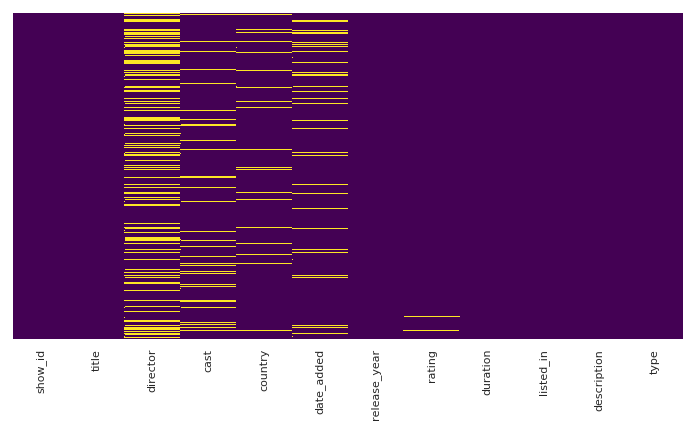

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(netflixData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's explore the data in each column a little more by looking at the first 5 rows.

In [5]:
netflixData.head(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


# Content Type on Netflix

There are almost 4 times as many movies as TV shows on Netflix

Text(0.5,0,'Type')

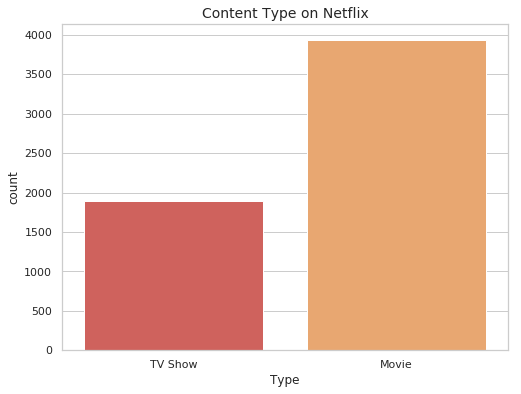

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='type',data=netflixData)
plt.title('Content Type on Netflix',fontsize=14)
plt.xlabel('Type')

# Netflix Titles Released Each Year

The majority of Netflix Titles were released in 2008-2020 with the most titles being released in 2018

Text(0.5,1,'Number of Netflix Titles Released Each Year')

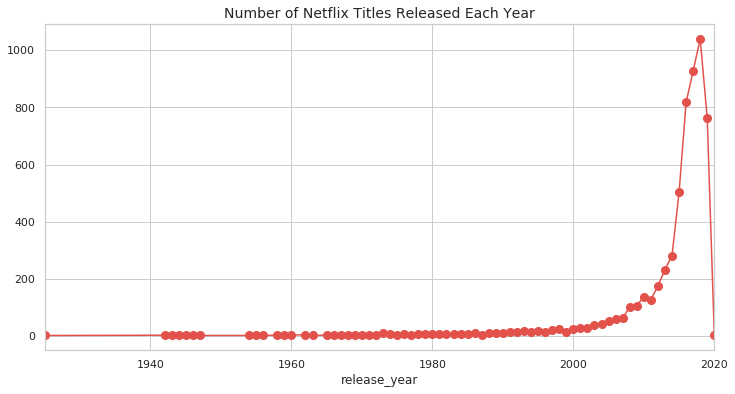

In [7]:
plt.figure(figsize=(12,6))
netflixData.groupby('release_year').count()['title'].plot(marker='o',markersize=8)
plt.title('Number of Netflix Titles Released Each Year',fontsize=14)

If we break this down by content type we can see a similar trend as described above for both TV shows and Movies

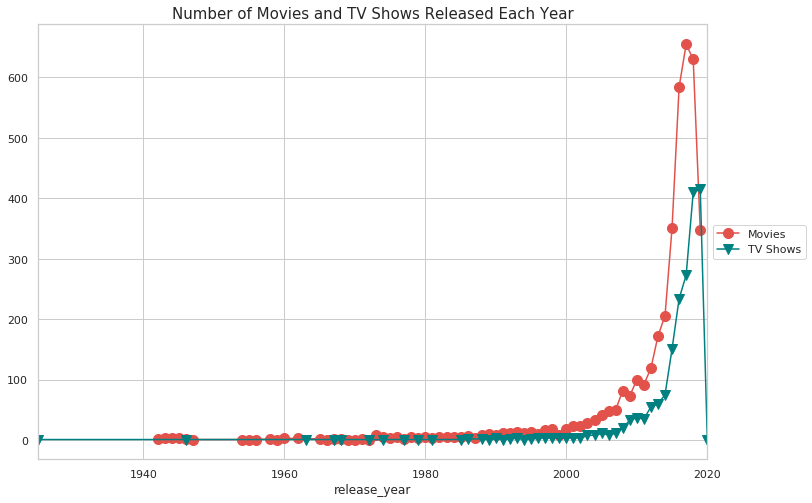

In [8]:
plt.figure(figsize=(12,8))
netflixData[netflixData['type']=='Movie'].groupby('release_year').count()['title'].plot(marker='o',ms=10,label='Movies')
netflixData[netflixData['type']=='TV Show'].groupby('release_year').count()['title'].plot(marker='v',ms=10,color='teal',label='TV Shows')
plt.title('Number of Movies and TV Shows Released Each Year',fontsize=15)
plt.legend(loc='center left',bbox_to_anchor = (1,.5))

In [9]:
netflixData['date_added'].dropna()
netflixData['date_added'] = pd.to_datetime(netflixData['date_added'])
netflixData['Year'] = netflixData['date_added'].apply(lambda time: time.year)

# Netflix Titles Added Each Year

From this figure it appears that Netflix only started adding content in 2015. However, as Netflix started it's streaming services in 2007, it seems that this data is incomplete. Despite this, this data demonstrates that from 2015-2020 there was a steady increase in titles being added.

Text(0.5,1,'Number of Netflix Titles Added per Year')

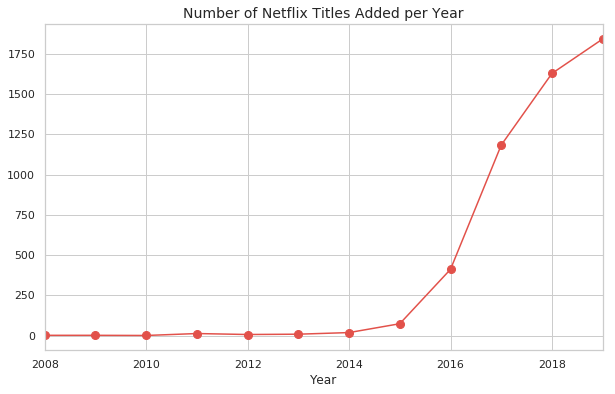

In [10]:
plt.figure(figsize=(10,6))
netflixData.groupby('Year').count()['title'].plot(marker='o',ms=8)
plt.title('Number of Netflix Titles Added per Year',fontsize=14)

We can also break this down by content type and see a similar pattern of increases in content from 2015-2020. It appears as though Netflix was adding more movies that TV shows, especially in 2018.

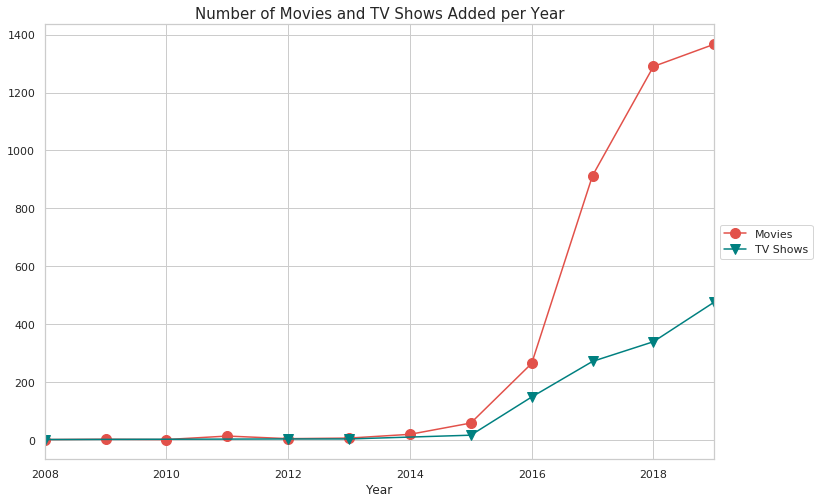

In [11]:
plt.figure(figsize=(12,8))
netflixData[netflixData['type']=='Movie'].groupby('Year').count()['title'].plot(marker='o',ms=10,label='Movies')
netflixData[netflixData['type']=='TV Show'].groupby('Year').count()['title'].plot(marker='v',ms=10,color='teal',label='TV Shows')
plt.title('Number of Movies and TV Shows Added per Year',fontsize=15)
plt.legend(loc='center left',bbox_to_anchor = (1,.5))


# Movie Duration

Most movies appear to be around 100 minutes

Text(0.5,1,'Movie Duration')

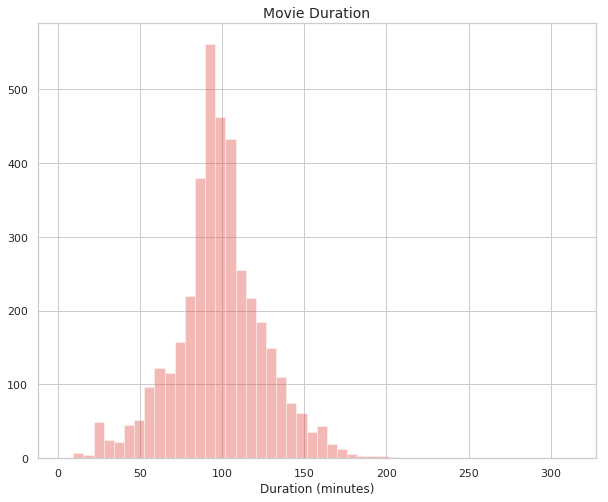

In [12]:
netflixData['Dur'] = netflixData[netflixData['type']=='Movie']['duration'].apply(lambda dur: dur.split(' min')[0])
netflixData['Dur'] = pd.to_numeric(netflixData['Dur'])

plt.figure(figsize=(10,8))
sns.distplot(netflixData['Dur'].dropna(),kde=False,axlabel='Duration (minutes)')
plt.title('Movie Duration',fontsize=14)

Looking at this distribution, we see that some movies are less than 25 minutes. I was curious as to how many were.

In [13]:
netflixData[netflixData['Dur']<25]['title'].count()

48

I was also curious as to which year(s) these short movies were released.

In [14]:
netflixData[netflixData['Dur']<25]['Year'].unique()

array([2019., 2018., 2017., 2016.])

The average duration of movies in minutes released each year. Interestingly movies were the longest in the 1960's. I would have guessed movies were getting longer in the past 10 years but movies have actually gotten shorter.

Text(0,0.5,'Duration (minutes)')

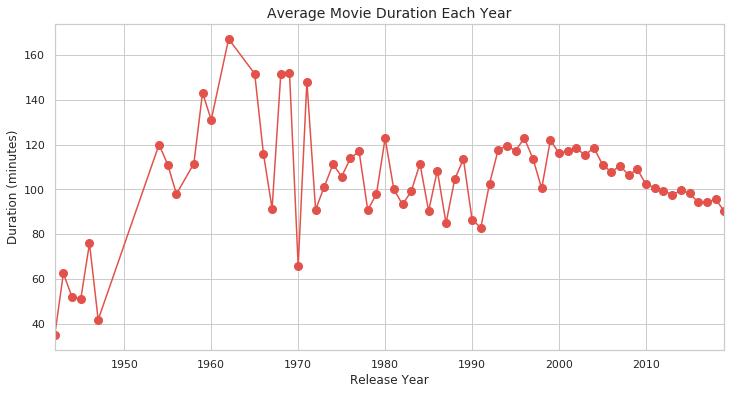

In [15]:
plt.figure(figsize=(12,6))
netflixData[netflixData['type']=='Movie'].groupby('release_year').mean()['Dur'].plot(marker='o',ms=8)
plt.title('Average Movie Duration Each Year',fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')

# How many Netflix titles were released the same year they were available to watch on Netflix?

Starting it 2017, it seems that Netflix was adding all titles the same year they were released.

Text(0.5,1,'Netflix Titles that were Released the Same Year they were Produced')

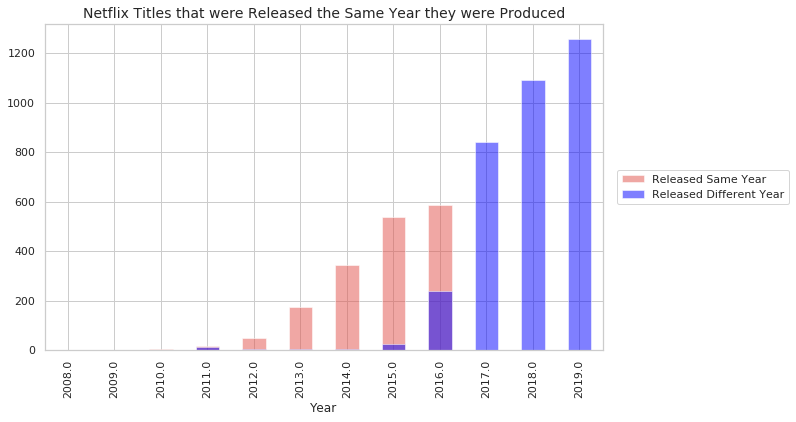

In [16]:
plt.figure(figsize=(10,6))
netflixData[netflixData['release_year']==netflixData['Year']].groupby('Year').count()['type'].plot(kind='bar',alpha=.5,label='Released Same Year')
netflixData[netflixData['release_year']!=netflixData['Year']].groupby('Year').count()['type'].plot(kind='bar',color='blue',alpha=.5,label='Released Different Year')
plt.legend(loc='center',bbox_to_anchor = (1.18,.5))
plt.title('Netflix Titles that were Released the Same Year they were Produced',fontsize=14)

# How many Netflix titles were released in each country?

I plotted the top 20 countries for easier visualization. The United States has the most releases followed by India and the UK.

In [17]:
from collections import Counter
countryDrop = netflixData['country'].dropna()
countryNew = pd.Series(dict(Counter(','.join(countryDrop).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
countryNew[:20].iplot(kind='bar',color='red',title='Top 20 Countries With the Most Netflix Releases',theme='white')

# Who Directed the Most Netflix Titles?

In [18]:
DirectorDrop = netflixData['director'].dropna()
DirectorNew = pd.Series(dict(Counter(','.join(DirectorDrop).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
DirectorNew[:20].iplot(kind='bar',color='teal',title='Top 20 Directors of Netflix Titles',theme='white')

# Who Acted in the Most Netflix Titles?

In [20]:
ActorDrop = netflixData['cast'].dropna()
actorNew = pd.Series(dict(Counter(','.join(ActorDrop).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
actorNew[:20].iplot(kind='bar',color='purple',title='20 Most Prevalent Actors in Netflix Titles',theme='white')

Thanks for checking this out! 
-- Brittany Corbett